In [1]:
import os
os.chdir("C:/Users/Kali Prasad/Desktop/rekha/chest_xray")

In [2]:
import pandas as pd
import numpy as np 
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout, Flatten, Dense 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 

Using TensorFlow backend.
C:\Users\Kali Prasad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kali Prasad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kali Prasad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kali Prasad\anaconda3\lib\site-packages\tensorflow\py

In [3]:
#Intialize the model
model=Sequential()

In [4]:
# Add Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [5]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
#Add Flattening Layer
model.add(Flatten())

In [7]:
#Add Hidden Layer
model.add(Dense(init="uniform",activation="relu",output_dim=120))

C:\Users\Kali Prasad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120, kernel_initializer="uniform")`
  


In [8]:
#Add Output layer
model.add(Dense(init="uniform",activation="sigmoid",output_dim=1))

C:\Users\Kali Prasad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [9]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
x_train = train_datagen.flow_from_directory('train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                class_mode = 'binary')
x_test = test_datagen.flow_from_directory('test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
print(x_train.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [13]:
history=model.fit(x_train,
                         steps_per_epoch = 150,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 63)


Epoch 1/10
150/150 [==============================] - 435s 3s/step - loss: 0.3895 - accuracy: 0.8283 - val_loss: 0.3631 - val_accuracy: 0.8323
Epoch 2/10
150/150 [==============================] - 389s 3s/step - loss: 0.2533 - accuracy: 0.8931 - val_loss: 0.6059 - val_accuracy: 0.8460
Epoch 3/10
150/150 [==============================] - 264s 2s/step - loss: 0.2170 - accuracy: 0.9121 - val_loss: 0.2186 - val_accuracy: 0.8938
Epoch 4/10
150/150 [==============================] - 213s 1s/step - loss: 0.1966 - accuracy: 0.9223 - val_loss: 0.3391 - val_accuracy: 0.8272
Epoch 5/10
150/150 [==============================] - 1080s 7s/step - loss: 0.1756 - accuracy: 0.9271 - val_loss: 0.6877 - val_accuracy: 0.8059
Epoch 6/10
150/150 [==============================] - 192s 1s/step - loss: 0.1788 - accuracy: 0.9298 - val_loss: 0.6204 - val_accuracy: 0.7998
Epoch 7/10
150/150 [==============================] - 183s 1s/step - loss: 0.1714 - accuracy: 0.9327 - val_loss: 0.5779 - val_accuracy: 0.80

In [15]:
model.save("skindisease1.h5")

In [17]:
from keras.models import load_model
import numpy as np
import cv2

In [18]:
model = load_model('skindisease1.h5')

from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")

In [26]:
frame=cv2.imread("C:/Users/Kali Prasad/Desktop/rekha/chest_xray/train/NORMAL/IM-0131-0001.jpeg")
data = detect(frame)

[[0.03879121]]
[[0]]


In [27]:
#model.compile(loss='categorical_crossentropy',optimizer="sgd",metrics=["accuracy"])
acc=history.history['accuracy']

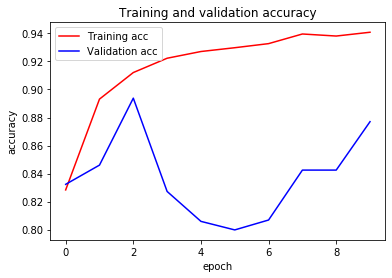

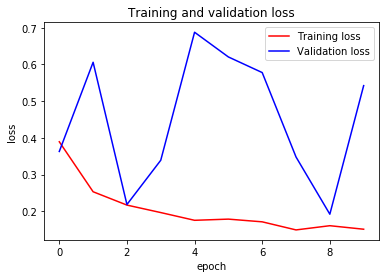

In [28]:
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()